In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.svm import SVC

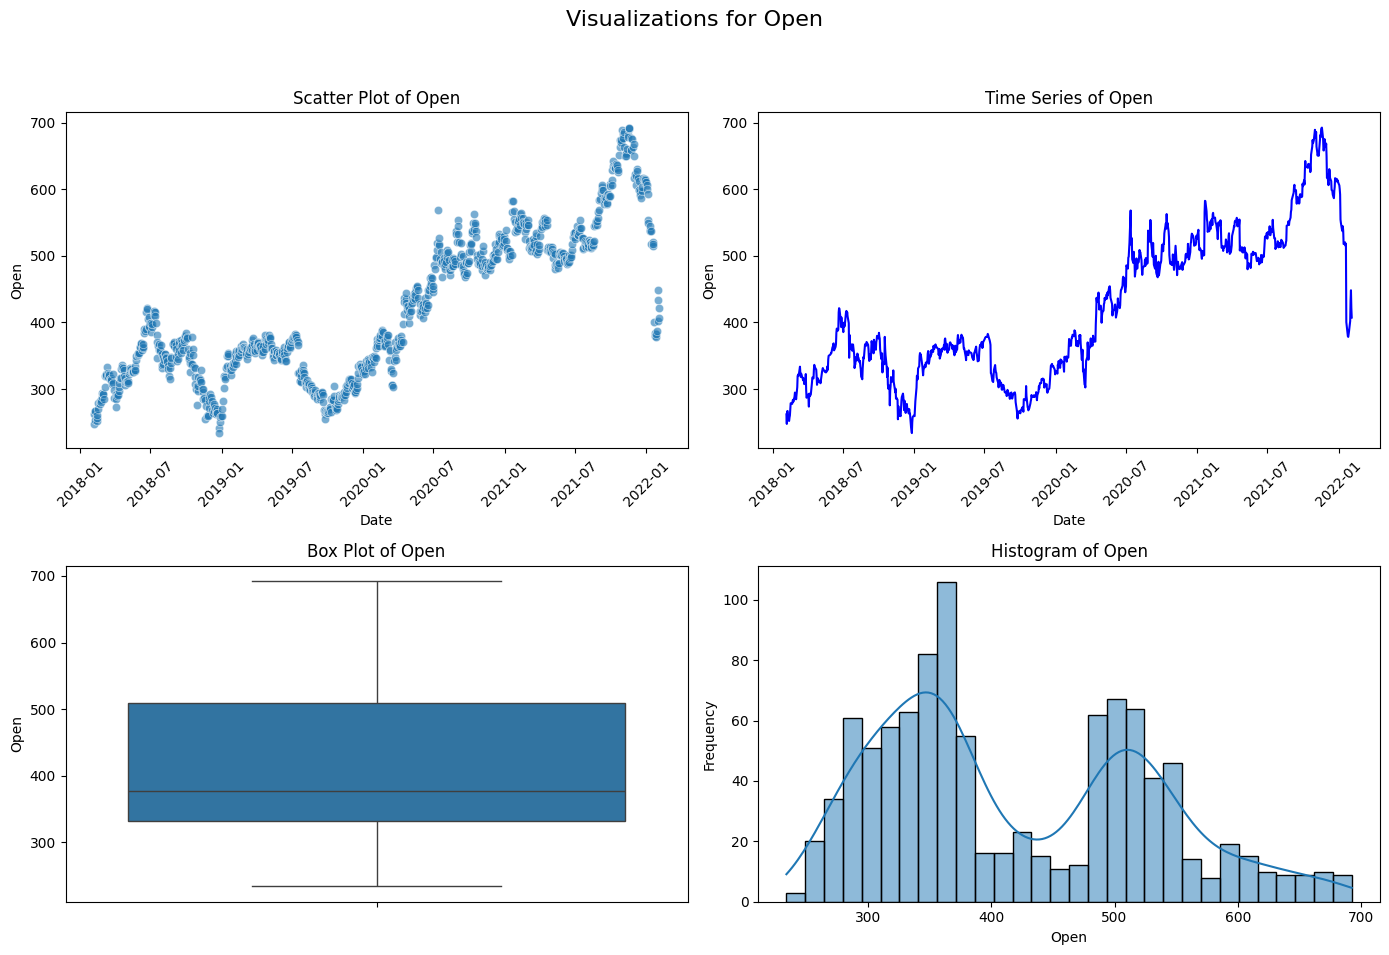

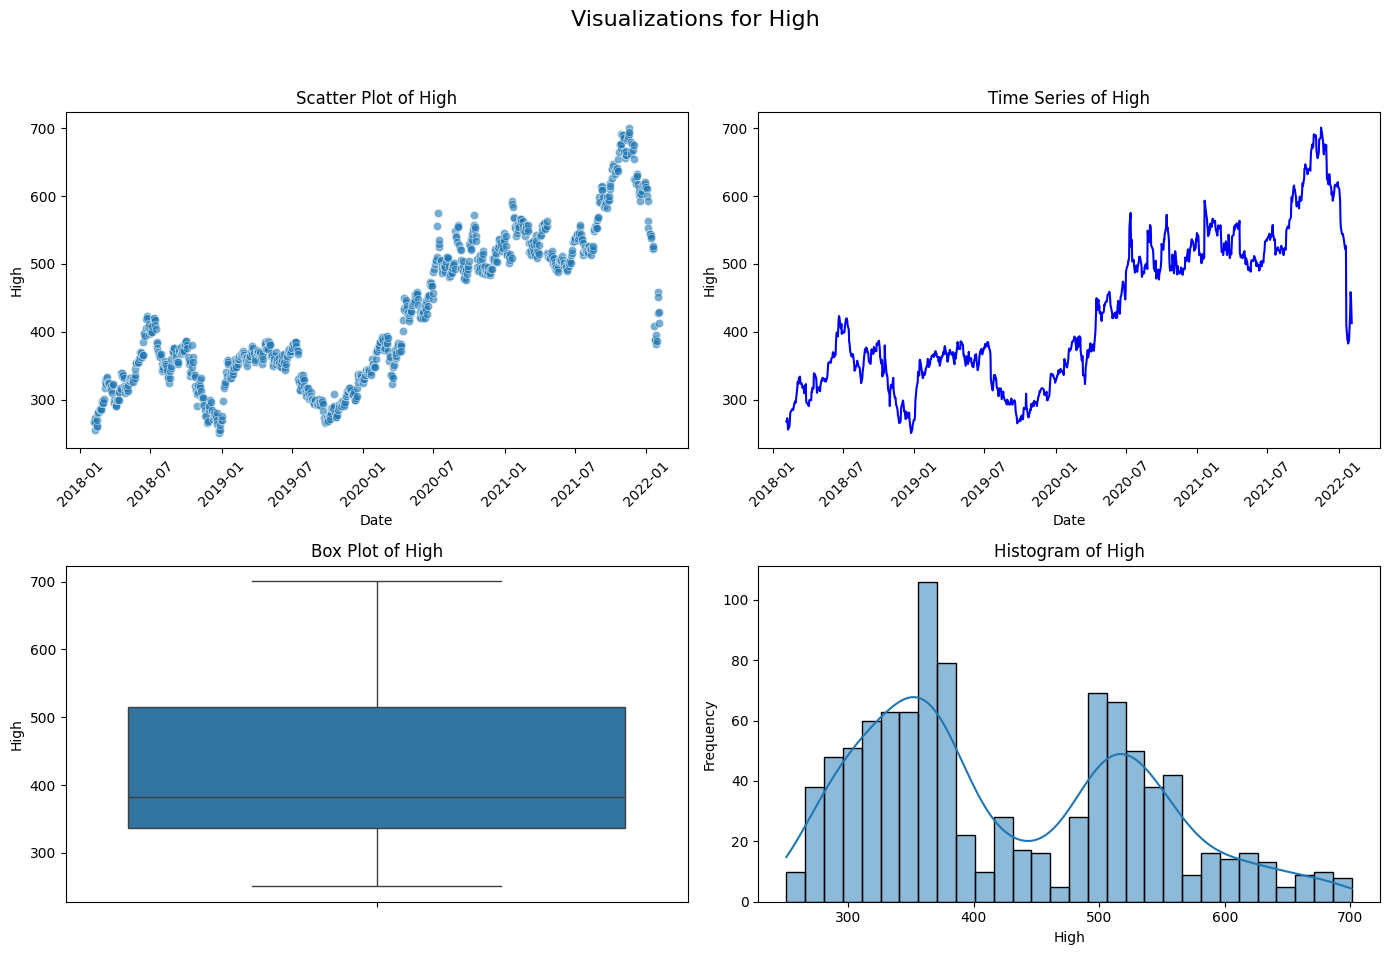

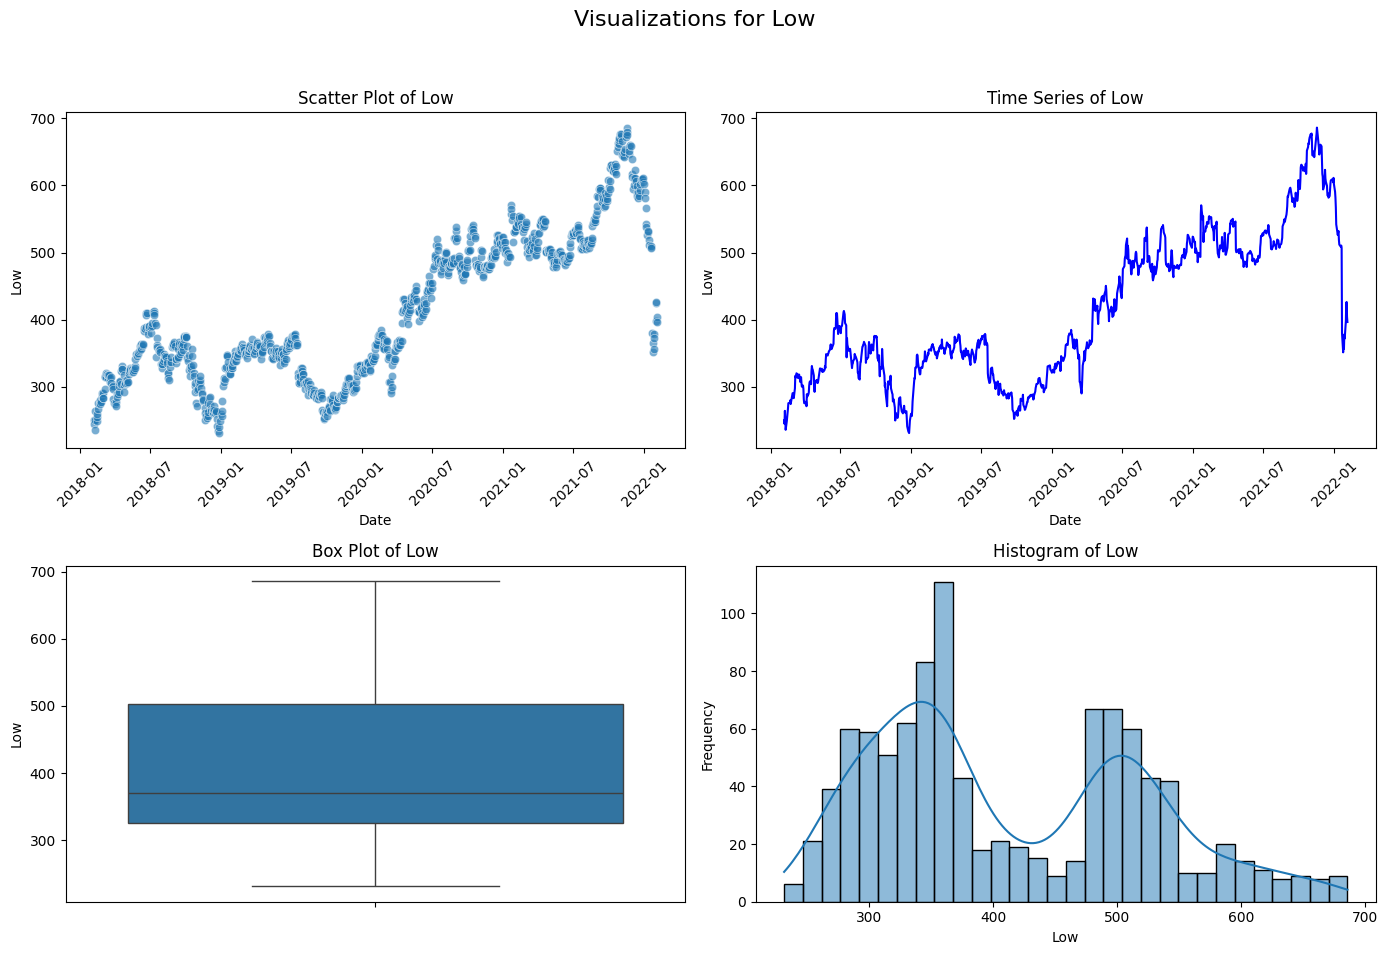

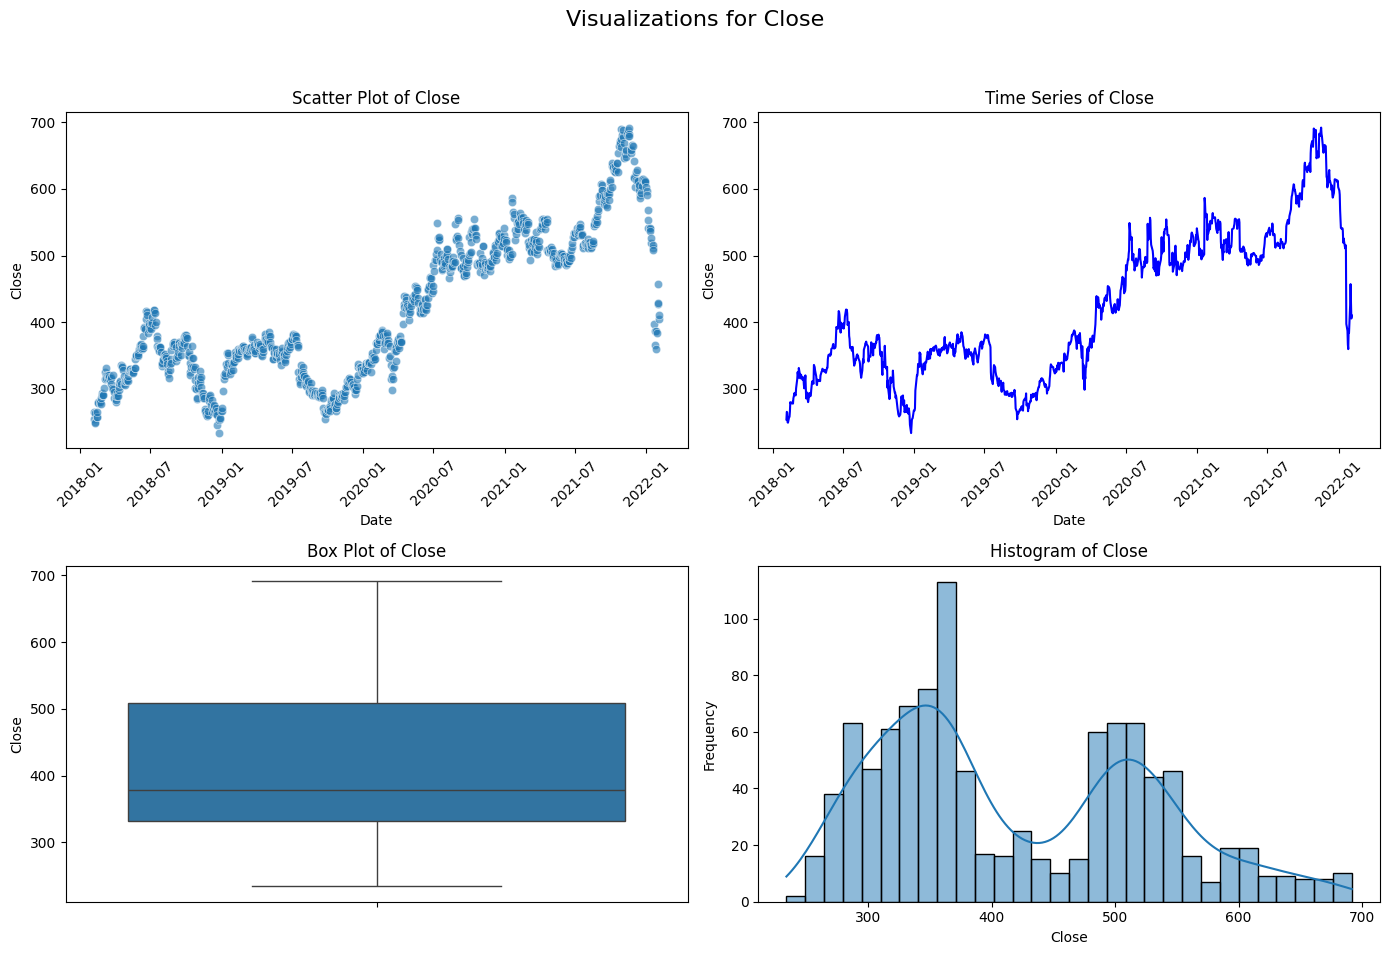

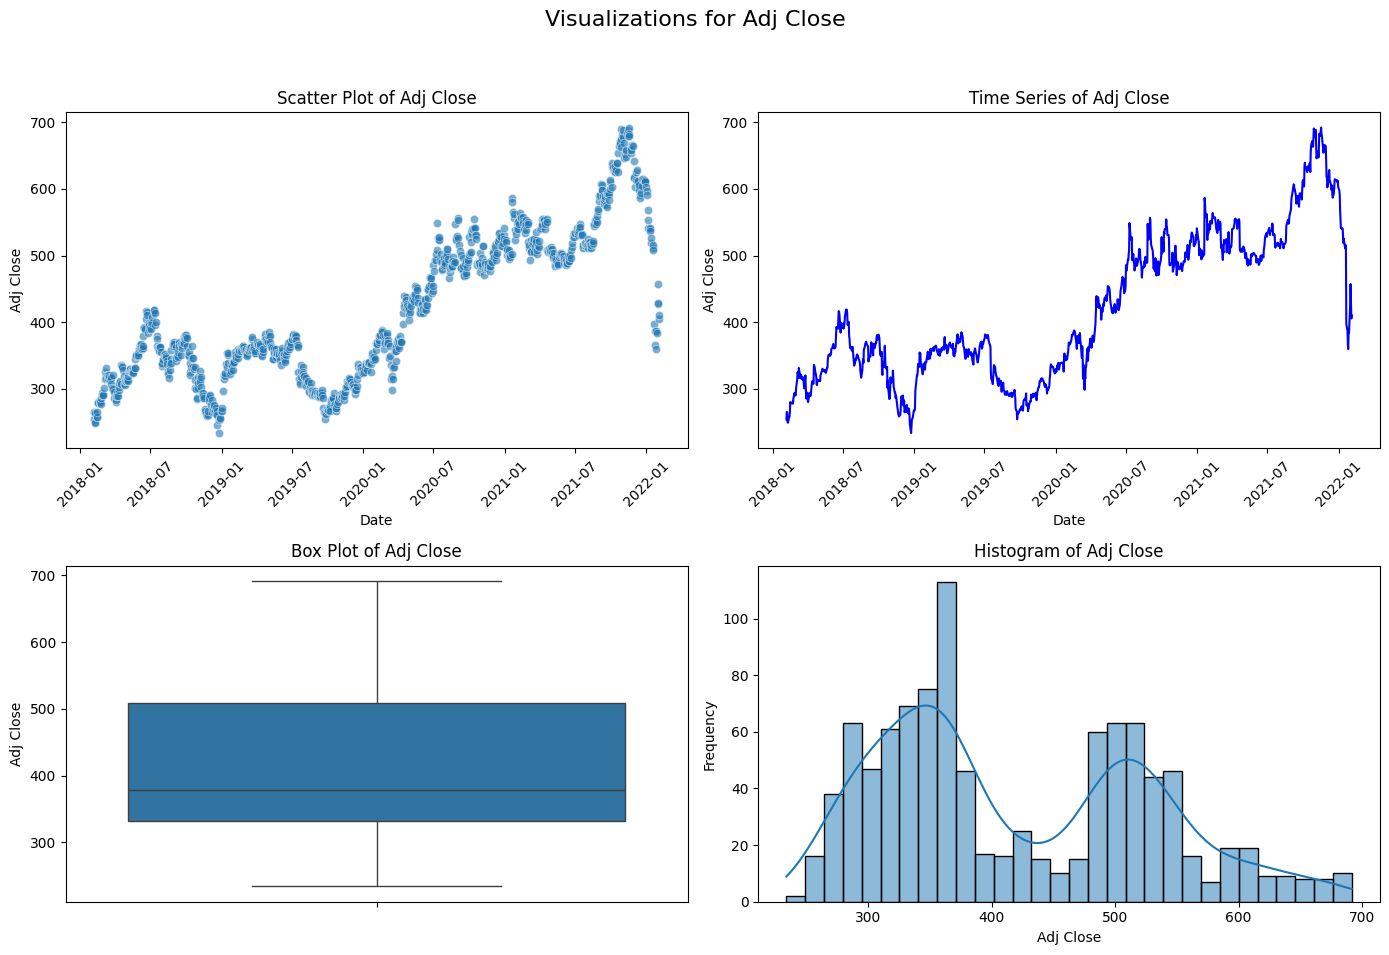

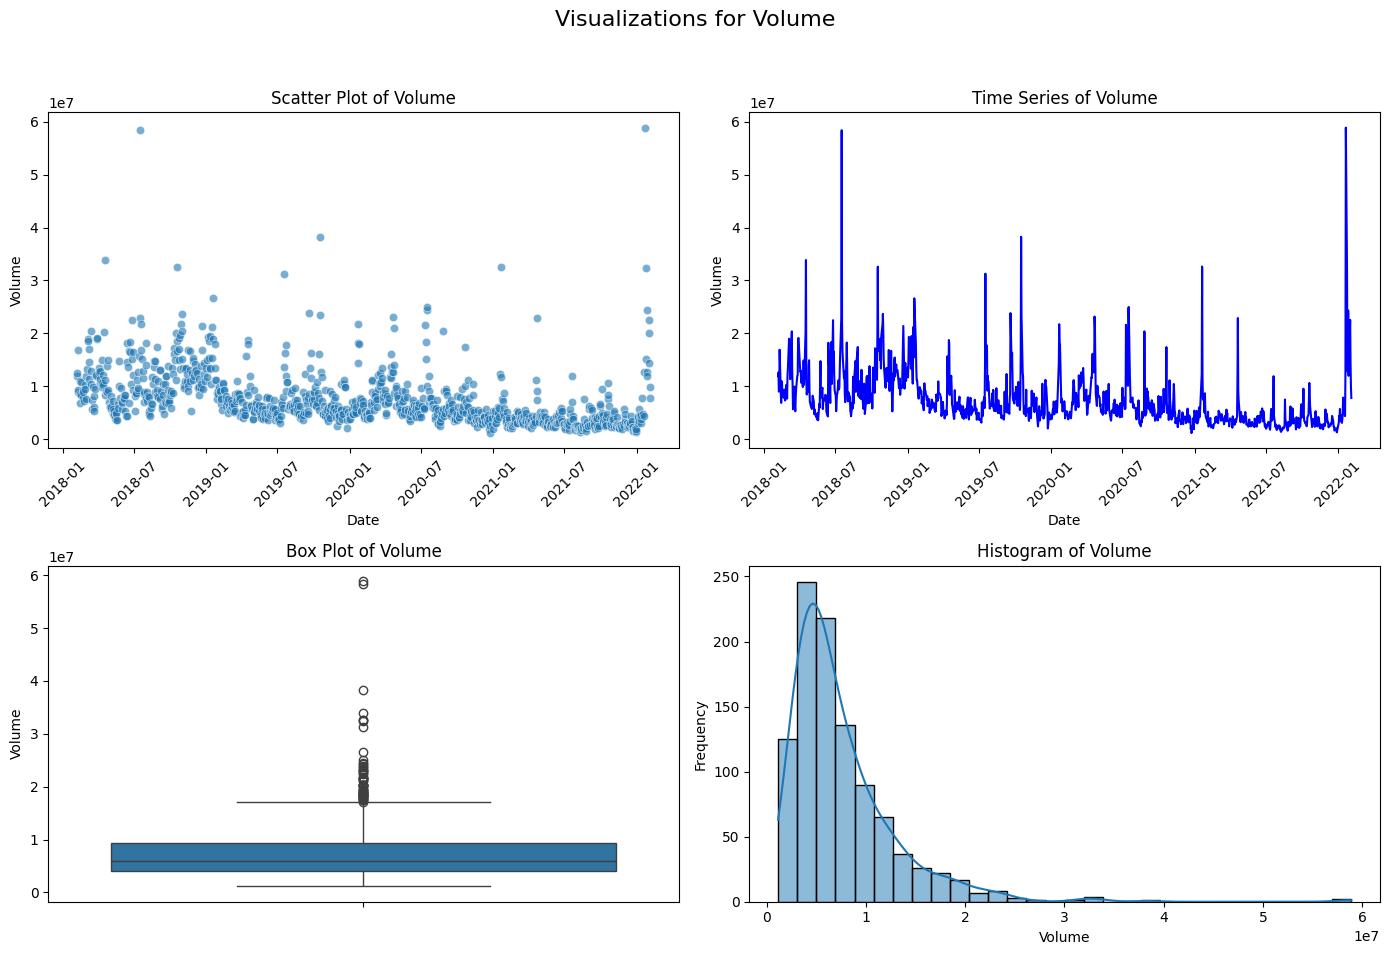

In [1]:
df = pd.read_csv('/content/NFLX.csv')

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# List of numeric columns to plot (excluding Date)
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Loop over each numeric column to create the graphs
for col in numeric_columns:
    # Create a figure with a 2x2 grid of subplots for each type of plot
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(f'Visualizations for {col}', fontsize=16)

    # Scatter plot: Date vs. column
    sns.scatterplot(ax=axes[0, 0], x=df['Date'], y=df[col], alpha=0.6)
    axes[0, 0].set_title(f'Scatter Plot of {col}')
    axes[0, 0].set_xlabel('Date')
    axes[0, 0].set_ylabel(col)
    axes[0, 0].tick_params(axis='x', rotation=45)

    # Time series plot (line plot): Date vs. column
    axes[0, 1].plot(df['Date'], df[col], color='blue')
    axes[0, 1].set_title(f'Time Series of {col}')
    axes[0, 1].set_xlabel('Date')
    axes[0, 1].set_ylabel(col)
    axes[0, 1].tick_params(axis='x', rotation=45)

    # Box plot: Distribution of the column
    sns.boxplot(ax=axes[1, 0], y=df[col])
    axes[1, 0].set_title(f'Box Plot of {col}')
    axes[1, 0].set_ylabel(col)

    # Histogram: Distribution of the column with KDE
    sns.histplot(ax=axes[1, 1], data=df, x=col, bins=30, kde=True)
    axes[1, 1].set_title(f'Histogram of {col}')
    axes[1, 1].set_xlabel(col)
    axes[1, 1].set_ylabel('Frequency')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


In [5]:
# Step 3: Outlier Detection & Removal (IQR Method)
# Calculate IQR for the 'Close' column
Q1 = df['Close'].quantile(0.25)
Q3 = df['Close'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_cleaned = df[(df['Close'] >= lower_bound) & (df['Close'] <= upper_bound)]
print(f"Number of outliers removed: {df.shape[0] - df_cleaned.shape[0]}")

Number of outliers removed: 0


In [24]:

# Step 1: Load Data and Create Target
df = pd.read_csv('NFLX.csv')
df['Date'] = pd.to_datetime(df['Date'])

df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)
df = df.dropna()

# Step 2: Define Features and Split Data

features = ['Open', 'High', 'Low', 'Volume']
X = df[features]
y = df['Target']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features for models that need it (Logistic Regression & SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_pred))
print("-" * 60)

# 2. Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)
print("Decision Tree Classification Report:")
print(classification_report(y_test, dtc_pred))
print("-" * 60)

# 3. Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, rfc_pred))
print("-" * 60)

# 4. Support Vector Machine (SVM)
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train_scaled, y_train)
svm_pred = svm_clf.predict(X_test_scaled)
print("SVM Classification Report:")
print(classification_report(y_test, svm_pred))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.39      0.46        97
           1       0.56      0.71      0.63       105

    accuracy                           0.56       202
   macro avg       0.56      0.55      0.54       202
weighted avg       0.56      0.56      0.55       202

------------------------------------------------------------
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.45      0.45        97
           1       0.49      0.49      0.49       105

    accuracy                           0.47       202
   macro avg       0.47      0.47      0.47       202
weighted avg       0.47      0.47      0.47       202

------------------------------------------------------------
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.53      0.52        9